## trying make_blobs to generate points and using sklearn kmeans to cluster group of points 

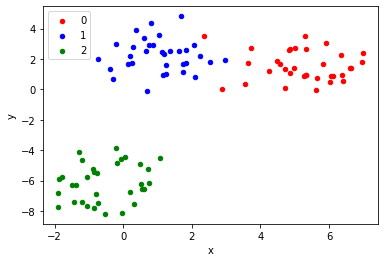

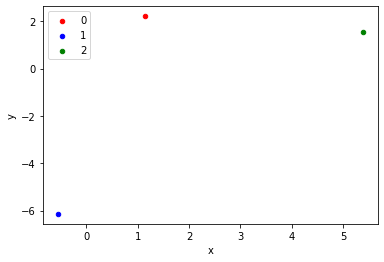

[[ 5.25694641  0.88452014]
 [ 1.69815097  4.80779441]
 [ 5.29135711  3.48904469]
 [ 0.32258946 -7.54592564]
 [ 4.4774511   1.85455897]
 [ 0.5999438   3.3873575 ]
 [ 1.04406453  3.57679708]
 [ 6.41617631  0.57761815]
 [-0.84109316 -5.41490015]
 [ 2.97963826  1.89998563]
 [ 5.32458176  0.93586684]
 [-1.8661375  -5.8659958 ]
 [ 1.07130871 -4.48969335]
 [ 1.73185491  1.16783873]
 [ 1.84097928  1.76017237]
 [-0.29227372  0.64968248]
 [ 5.82806739  1.67020412]
 [ 4.71023517  0.1086677 ]
 [-0.7529656  -5.50751249]
 [ 5.31914744  0.96516   ]
 [ 1.36290814  2.50161809]
 [ 5.62823234 -0.0240681 ]
 [ 0.752052   -6.17264124]
 [ 6.1030029   0.86784043]
 [ 0.53942766 -6.5749199 ]
 [ 6.95473972  1.7795093 ]
 [ 0.13546473  1.69343569]
 [-1.36751781 -6.30212291]
 [ 4.55631578  1.673349  ]
 [ 1.61750144  2.49545334]
 [ 6.04096447  0.88963512]
 [ 4.98336273  1.37978033]
 [ 3.7099588   2.74583836]
 [ 6.01969127  0.50841975]
 [-1.43963466 -7.43510006]
 [ 6.37605077  0.91167485]
 [-0.73280823 -7.50089102]
 

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
X,y=make_blobs(n_samples=100,centers=3,n_features=2)
def plot_points(X,y):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue',2:'green'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()  
  pass


plot_points(X,y)


kmeans=KMeans(n_clusters=3).fit(X)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)

plot_points(centroids,centroid_labels)
  
print(X)


# using k means clustering on class example 

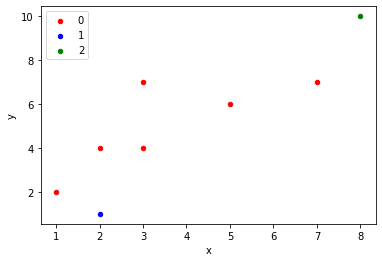

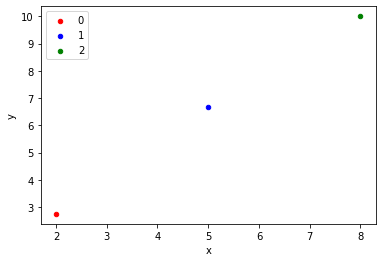

centroids :  [[ 2.          2.75      ]
 [ 5.          6.66666667]
 [ 8.         10.        ]]
x_labels :  [0 0 0 2 1 1 0 1]


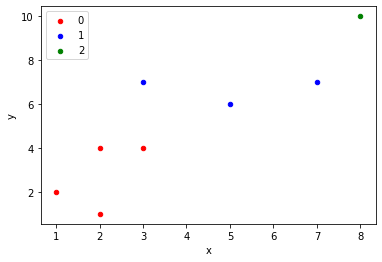

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
X=np.array([[1,2],[2,1],[3,4],[8,10],[3,7],[5,6],[2,4],[7,7]])
y=np.array([0,1,0,2,0,0,0,0])

def plot_points(X,y):
  
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue',2:'green'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()  
  pass


plot_points(X,y)


kmeans=KMeans(n_clusters=3).fit(X)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)

plot_points(centroids,centroid_labels)
  

print("centroids : ",centroids)
x_labels=kmeans.predict(X)
print("x_labels : ",x_labels)
plot_points(X,x_labels)


# Trying kmeans on load digits dataset


False
False
False
False
False
False
False
False
False
False
silhouette_avg :  0.1790844372444334


/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


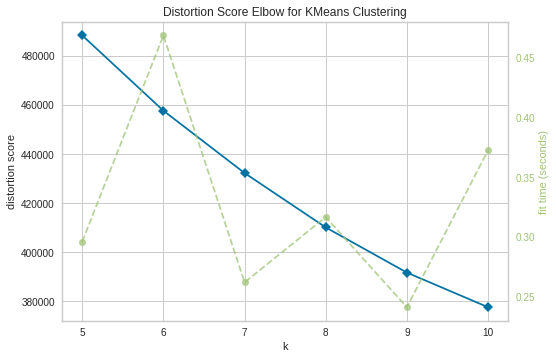

y is :  [6, 8, 3, 7, 2, 2, 5, 3, 5, 2]


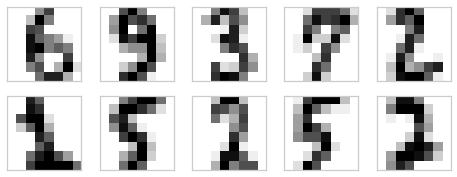

In [70]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


def plot_digits(X):
  fig, ax = plt.subplots(len(X)//5,5, figsize = (8,3)) #Create a figure and a set of␣,→subplots( 2 rows and 5 columns)
  centers = X
  for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣,→plotting relevant centers
    center=center.reshape(8,8)
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
  pass


digits=load_digits()
ds=digits.keys()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)
kmeans=KMeans(n_clusters=10).fit(X_train)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)


map={}
length=len(X_train)
for _ in range(length):
  x,y=X_train[_],y_train[_]
  if(len(map)>=10): break
  map[kmeans.predict([x])[0]]=y
  pass

y=kmeans.predict(X_test)
y=[map[elem] for elem in y]

for i in range(10):
  mask=(y==i)
  print(mask)
  pass

silhouette_avg = silhouette_score(X_test, kmeans.predict(X_test))
print("silhouette_avg : ",silhouette_avg)

visualizer=KElbowVisualizer(kmeans,k=(5,11))
visualizer.fit(X_test)
visualizer.show()


plot_digits(X_test[0:10])

print("y is : ",y[0:10])